### Objective of the project

To perform a service request data analysis of New York City 311 calls. To use data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

In [13]:
### Importing required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
### Importing a 311 NYC service request

Data1=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11360\1656539925.py:3: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  Data1=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


In [15]:
Data1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [16]:
### Importing date time package

from datetime import date, time, datetime

In [17]:
### Converting the columns ‘Created Date’ and Closed Date’ to datetime datatype.

Data1['Created Date'] = Data1['Created Date'].astype('datetime64[ns]')
Data1['Closed Date'] = Data1['Closed Date'].astype('datetime64[ns]')
Data1["Time_Difference"] = Data1['Closed Date'] - Data1['Created Date']
Data1["Request_Closing_Time"] = (Data1["Time_Difference"].astype('timedelta64[s]'))/(60*60)

In [18]:
Data1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time_Difference,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556


In [19]:
### Creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. 

Data1["Time_Difference"] = Data1['Closed Date'] - Data1['Created Date']
Data1["Request_Closing_Time"] = (Data1["Time_Difference"].astype('timedelta64[s]'))/(60*60)

In [20]:
Data1.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time_Difference,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,0.920833
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",0 days 01:26:16,1.437778
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",0 days 04:51:31,4.858611
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:00,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",0 days 07:45:14,7.753889
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:00,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",0 days 03:27:02,3.450556


In [21]:
Data1.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Time_Difference,Request_Closing_Time
300693,30281872,2015-03-29 00:33:41,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
300694,30281230,2015-03-29 00:33:28,2015-03-29 02:33:59,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)",0 days 02:00:31,2.008611
300695,30283424,2015-03-29 00:33:03,2015-03-29 03:40:20,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)",0 days 03:07:17,3.121389
300696,30280004,2015-03-29 00:33:02,2015-03-29 04:38:35,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)",0 days 04:05:33,4.092500
300697,30281825,2015-03-29 00:33:01,2015-03-29 04:41:50,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,251 WEST 48 STREET,...,NaN,NaN,NaN,NaN,NaN,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)",0 days 04:08:49,4.146944


<Axes: xlabel='Complaint Type'>

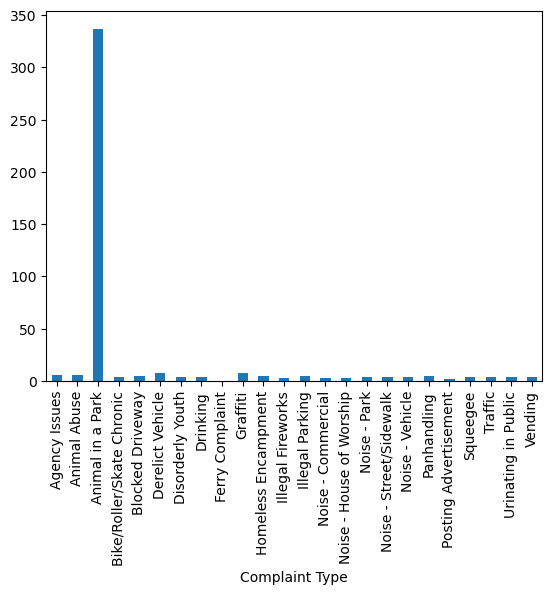

In [22]:
### Providing major insights/patterns in a visual format (graphs or tables)
### Providing at least 4 major conclusions after generic data mining.

### Plotting a bar graph of Complaint type vs Request_Closing_Time

    Data1.groupby("Complaint Type")["Request_Closing_Time"].mean().plot.bar()

In [23]:
### Conclusion 1:
### From above bar graph it is clear that the complaint of Animal in a park takes maximum average closing time.
### It can also be observed that this complaint is an outlier.

<Axes: xlabel='Location Type'>

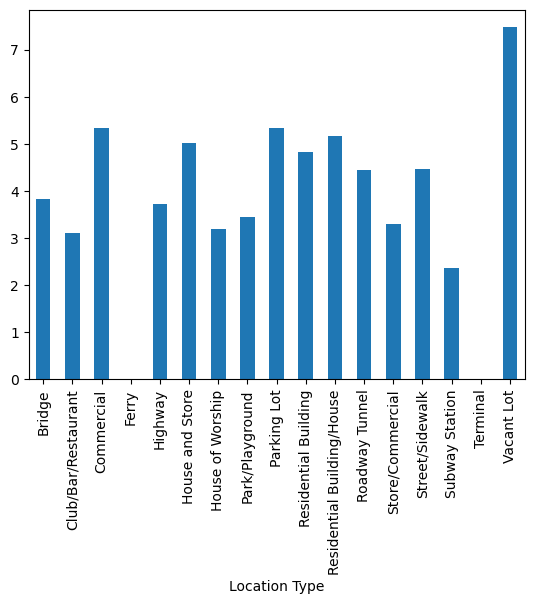

In [25]:
### Removing Animal in the park compliant from the dataset.
### Now ploting a bar graph of Complaint type vs Request_Closing_Time

Data1.loc[Data1["Complaint Type"] != "Animal in a Park", ].groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()

In [27]:
### Conclusion 2:
### From above bar graph it is clear that the complaint of Derelict Vehicle and Graffiti takes maximum average closing time.

<Axes: xlabel='Location Type'>

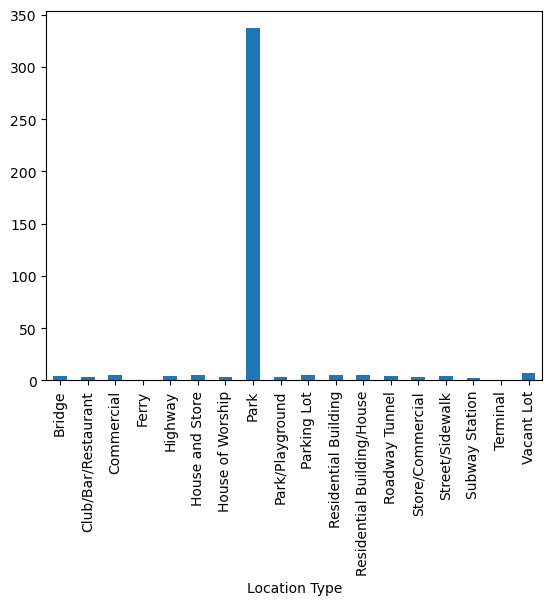

In [28]:
### Plotting a bar graph of Location type vs Request_Closing_Time

Data1.groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()

In [ ]:
### Conclusion 3:
### From the above bar graph it can be observed that the location which has the maximum average closing time is Park
### According to the first conclusion, Animal in a park is the outlier
### Similarly Park here is the outlier


<Axes: xlabel='Location Type'>

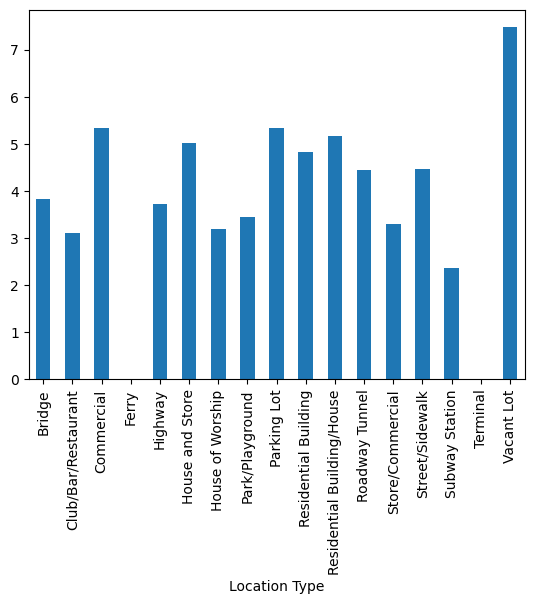

In [30]:
### Removing Park from the dataset
### Plotting a bar graph of Location type vs Request_Closing_Time

Data1.loc[Data1["Location Type"] != "Park",   ].groupby("Location Type")["Request_Closing_Time"].mean().plot.bar()

In [31]:
### Conclusion 4:
### According to the bar plot, Vacant Lot is the location type with maximum average request closing time.

<Axes: xlabel='City'>

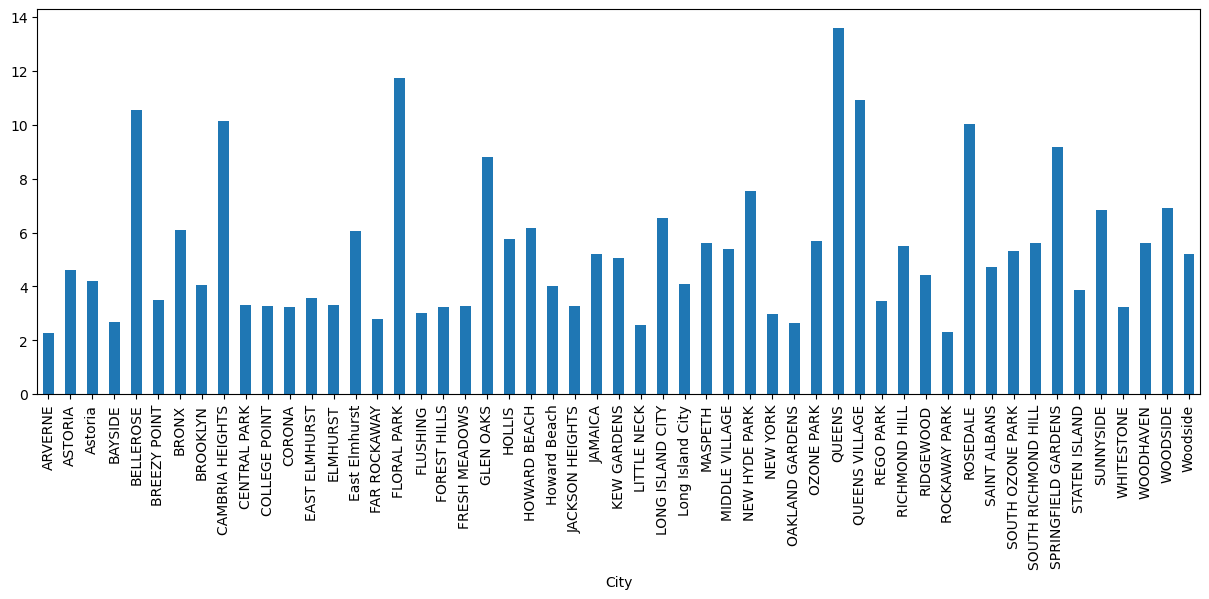

In [33]:
### Plotting a bar graph of City vs Request_Closing_Time

plt.rcParams["figure.figsize"] = (15, 5)
Data1.groupby("City")["Request_Closing_Time"].mean().plot.bar()

In [34]:
### Conclusion 5:
### From the above bar plot, it can be observed that the city with maximum average request closing time is Queens

In [35]:
### Ordering the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

Data2= pd.DataFrame(Data1.groupby(["Location","Complaint Type"])["Request_Closing_Time"].mean())
Data2.sort_values("Request_Closing_Time")


,,Request_Closing_Time
Location,Complaint Type,
"(40.678429539269835, -73.98361397723242)",Noise - Commercial,0.043611
"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,0.045278
"(40.69371028050496, -73.95499211670034)",Illegal Parking,0.046389
"(40.71598512070559, -73.9509008064274)",Illegal Parking,0.047500
"(40.72895633655987, -74.00074325193769)",Noise - Commercial,0.050000
...,...,...
"(40.73681034405816, -73.93570112335456)",Illegal Parking,NaN
"(40.74285387870548, -73.97913408166315)",Blocked Driveway,NaN
"(40.749256156669986, -74.00919964319513)",Noise - Street/Sidewalk,NaN


In [36]:
### Performing a statistical test.

In [46]:
### Statement 1: Whether the average response time across complaint types is similar or not (overall)

### Anova Hypothesis
### Hypothesis 0: Average response time across all complaint types is same
### Hypothesis 1: At least one group is different than others


import statsmodels.formula.api as sm
mod = sm.ols(formula= """Request_Closing_Time ~ Q('Complaint Type') """,data=Data1).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Request_Closing_Time   R-squared:                       0.037
Model:                              OLS   Adj. R-squared:                  0.036
Method:                   Least Squares   F-statistic:                     514.2
Date:                  Sun, 16 Jul 2023   Prob (F-statistic):               0.00
Time:                          10:28:18   Log-Likelihood:            -9.5737e+05
No. Observations:                298534   AIC:                         1.915e+06
Df Residuals:                    298511   BIC:                         1.915e+06
Df Model:                            22                                         
Covariance Type:              nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                            5.2603      2.440      2.156      0.031       0.477      10.043
Q('Complaint Type')[T.Animal Abuse]                 -0.0471      2.441     -0.019      0.985      -4.832       4.738
Q('Complaint Type')[T.Animal in a Park]            331.5744      6.456     51.356      0.000     318.920     344.229
Q('Complaint Type')[T.Bike/Roller/Skate Chronic]    -1.4939      2.458     -0.608      0.543      -6.311       3.323
Q('Complaint Type')[T.Blocked Driveway]             -0.5194      2.440     -0.213      0.831      -5.303       4.264
Q('Complaint Type')[T.Derelict Vehicle]              2.1038      2.441      0.862      0.389      -2.680       6.888
Q('Complaint Type')[T.Disorderly Youth]             -1.7017      2.466     -0.690      0.490      -6.535       3.131
Q('Complaint Type')[T.Drinking]                     -1.3985      2.446     -0.572      0.568      -6.193       3.396
Q('Complaint Type')[T.Ferry Complaint]            4.842e-13   1.07e-14     45.442      0.000    4.63e-13    5.05e-13
Q('Complaint Type')[T.Graffiti]                      1.8909      2.504      0.755      0.450      -3.017       6.799
Q('Complaint Type')[T.Homeless Encampment]          -0.8948      2.442     -0.366      0.714      -5.681       3.891
Q('Complaint Type')[T.Illegal Fireworks]            -2.4992      2.484     -1.006      0.314      -7.367       2.368
Q('Complaint Type')[T.Illegal Parking]              -0.7592      2.440     -0.311      0.756      -5.542       4.024
Q('Complaint Type')[T.Noise - Commercial]           -2.1132      2.441     -0.866      0.387      -6.897       2.670
Q('Complaint Type')[T.Noise - House of Worship]     -2.0670      2.448     -0.844      0.398      -6.865       2.731
Q('Complaint Type')[T.Noise - Park]                 -1.8496      2.442     -0.757      0.449      -6.636       2.937
Q('Complaint Type')[T.Noise - Street/Sidewalk]      -1.8151      2.440     -0.744      0.457      -6.598       2.968
Q('Complaint Type')[T.Noise - Vehicle]              -1.6713      2.441     -0.685      0.493      -6.455       3.112
Q('Complaint Type')[T.Panhandling]                  -0.8876      2.464     -0.360      0.719      -5.717       3.942
Q('Complaint Type')[T.Posting Advertisement]        -3.2845      2.452     -1.340      0.180      -8.090       1.521
Q('Complaint Type')[T.Squeegee]                     -1.2147      3.858     -0.315      0.753      -8.777       6.348
Q('Complaint Type')[T.Traffic]                      -1.8116      2.442     -0.742      0.458      -6.598       2.974
Q('Complaint Type')[T.Urinating in Public]          -1.6337      2.453     -0.666      0.505      -6.441       3.173
Q('Complaint Type')

In [47]:
### Conclusion:
### As the p-value is less than 0.05, therefore we reject the null hypothesis
### We can conclude that at least one group is different than others

In [51]:
### Statement 2: Are the type of complaint or service requested and location related?

### Anova hypothesis
### Hypothesis 0: Complaint type or service requested are not related to lacation
### Hypothesis 1: Complaint type or service requsted are related to location

Result1=pd.crosstab(index=Data1['Complaint Type'],columns=Data1['Location'])
from scipy.stats import chi2_contingency
Result2 = chi2_contingency(Result1)
print('The P-Value of the ChiSq Test is:', Result2[1])


The P-Value of the ChiSq Test is: 0.0


In [ ]:
### Conclusion:
### As the p-value is less than 0.05, therefore we reject the null hypothesis
### We can conclude that Complaint type or service requsted are related to location